# Web Mining and Applied NLP (44-620)
## Final Project: Article Summarizer
### Student Name: Adrianna Webb

[Github Repo](https://github.com/AdriannaWebb/web-scraping-custom)

In [25]:
# Install required packages
%pip install requests spacy spacytextblob matplotlib beautifulsoup4

# Ran 'python -m spacy download en_core_web_sm' in terminal


Note: you may need to restart the kernel to use updated packages.


In [26]:
# Import libraries
import requests
from bs4 import BeautifulSoup
from collections import Counter
import matplotlib.pyplot as plt
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import re

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Add sentiment analysis 
nlp.add_pipe("spacytextblob")

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course. Get the html for the article and store it in a file (which you must submit with your project)

In [27]:
# Question 1: Get the article HTML and save it to a file

url = "https://web.archive.org/web/20250808011345/https://www.the-independent.com/news/world/americas/somerville-cat-mayor-bike-path-election-b2799685.html"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find the article container (this is our version of their specific div)
article = soup.find('article')
article_html = str(article)

# Save it
with open('cat_mayor_article.html', 'wb') as f:
    f.write(article_html.encode('utf-8'))

print("Article HTML saved to cat_mayor_article.html")

Article HTML saved to cat_mayor_article.html


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use .get_text()). Print the polarity score with an appropriate label. Additionally print the number of sentences in the original article (with an appropriate label)

In [35]:
# Question 2: Read article HTML and do sentiment analysis 
import spacy
from textblob import TextBlob

nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")

# Read the HTML file 
with open('cat_mayor_article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse HTML and extract text
soup = BeautifulSoup(html_content, 'html.parser')

# Look for paragraph tags 
paragraphs = soup.find_all('p')
article_paragraphs = []

# Filter out navigation/header paragraphs and keep story paragraphs
for p in paragraphs:
    text = p.get_text().strip()
    # Keep paragraphs that are long enough and seem to be part of the story
    if (len(text) > 30 and 
        not any(nav_word in text.lower() for nav_word in ['menu', 'newsletter', 'subscribe', 'comments', 'edition']) and
        any(story_word in text.lower() for story_word in ['cat', 'mayor', 'berry', 'election', 'bike', 'somerville'])):
        article_paragraphs.append(text)

# Join the story paragraphs
article_text = ' '.join(article_paragraphs)

print(f"Article text length: {len(article_text)} characters")
print("Clean article preview:")
print(article_text[:300])
print()

# Process with spaCy for sentiment analysis
blob = TextBlob(article_text)
polarity_score = blob.sentiment.polarity

print(f"Article Polarity Score: {polarity_score}")

# Sentence counting
doc = nlp(article_text)
sentences = list(doc.sents)
num_sentences = len(sentences)

print(f"Number of sentences in the original article: {num_sentences}")

Article text length: 3090 characters
Clean article preview:
This mayoral election has gone to the dogs ... and the incumbent cat is not happy about it. A race to elect the newest bike path cat mayor in Somerville, Massachusetts (yes, that’s a thing) has been hijacked by an array of other animals – including a parrot, guinea pig, snake and tortoise. Several f

Article Polarity Score: 0.13732905982905982
Number of sentences in the original article: 26


3. Load the article text into a trained spaCy pipeline, and determine the 5 most frequent tokens (converted to lower case). Print the common tokens with an appropriate label. Additionally, print the tokens their frequencies (with appropriate labels)

In [36]:
# Question 3: Find the 5 most frequent tokens

# Process the article text with spaCy
doc = nlp(article_text)

# Get all tokens (words) and convert to lowercase
tokens = []
for token in doc:
    # Skip punctuation and whitespace
    if not token.is_punct and not token.is_space and len(token.text) > 1:
        tokens.append(token.text.lower())

print(f"Total tokens found: {len(tokens)}")

# Count token frequencies
from collections import Counter
token_counts = Counter(tokens)

# Get the 5 most common tokens
most_common_tokens = token_counts.most_common(5)

print("5 Most Frequent Tokens:")
for token, frequency in most_common_tokens:
    print(f"Token: '{token}' - Frequency: {frequency}")

Total tokens found: 521
5 Most Frequent Tokens:
Token: 'the' - Frequency: 33
Token: 'to' - Frequency: 17
Token: 'cat' - Frequency: 16
Token: 'and' - Frequency: 13
Token: 'for' - Frequency: 12


4. Load the article text into a trained spaCy pipeline, and determine the 5 most frequent lemmas (converted to lower case). Print the common lemmas with an appropriate label. Additionally, print the lemmas with their frequencies (with appropriate labels).

In [37]:
# Question 4: Find the 5 most frequent lemmas

# Process the article text with spaCy (we already have this as 'doc')
doc = nlp(article_text)

# Get all lemmas and convert to lowercase
lemmas = []
for token in doc:
    # Skip punctuation, whitespace, and very short words
    if not token.is_punct and not token.is_space and len(token.text) > 1:
        lemmas.append(token.lemma_.lower())

print(f"Total lemmas found: {len(lemmas)}")

# Count lemma frequencies
lemma_counts = Counter(lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_counts.most_common(5)

print("5 Most Frequent Lemmas:")
for lemma, frequency in most_common_lemmas:
    print(f"Lemma: '{lemma}' - Frequency: {frequency}")

Total lemmas found: 521
5 Most Frequent Lemmas:
Lemma: 'the' - Frequency: 33
Lemma: 'be' - Frequency: 26
Lemma: 'cat' - Frequency: 18
Lemma: 'to' - Frequency: 17
Lemma: 'and' - Frequency: 13


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

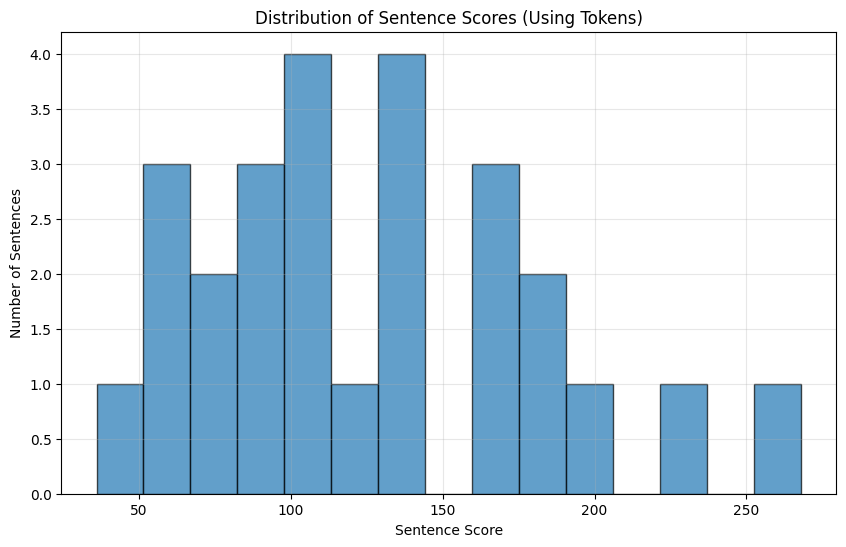

In [39]:
# Question 5: Make histogram of sentence scores using tokens

import matplotlib.pyplot as plt

# Process the article into sentences
doc = nlp(article_text)
sentences = list(doc.sents)

# Calculate score for each sentence using tokens
sentence_scores_tokens = []

for sent in sentences:
    sent_tokens = []
    for token in sent:
        if not token.is_punct and not token.is_space and len(token.text) > 1:
            sent_tokens.append(token.text.lower())
    
    score = 0
    for token in sent_tokens:
        score += token_counts[token]  
    
    sentence_scores_tokens.append(score)

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores_tokens, bins=15, edgecolor='black', alpha=0.7)
plt.title('Distribution of Sentence Scores (Using Tokens)')
plt.xlabel('Sentence Score')
plt.ylabel('Number of Sentences')
plt.grid(True, alpha=0.3)
plt.show()

# What's the most common range?: Most sentence scores seem to be between 30 and 250

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

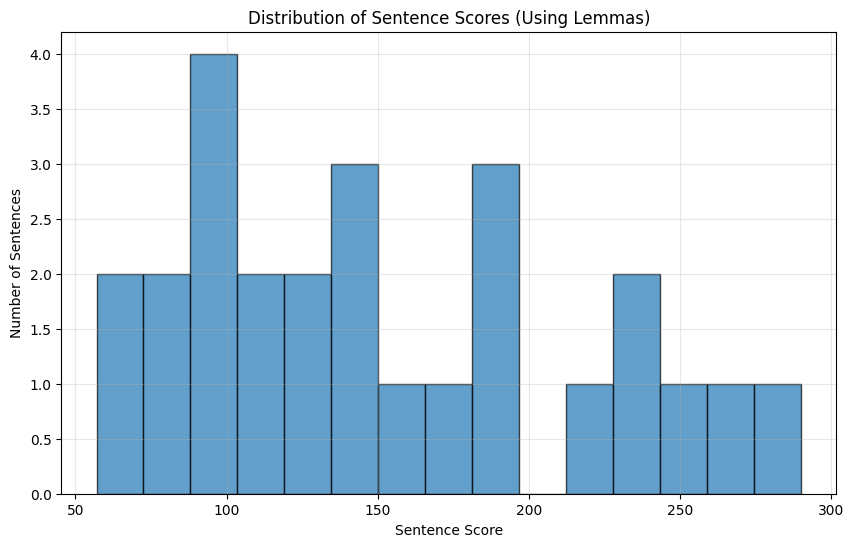

In [41]:
# Question 6: Make histogram of sentence scores using lemmas

# Calculate score for each sentence using lemmas
sentence_scores_lemmas = []

for sent in sentences:
    sent_lemmas = []
    for token in sent:
        if not token.is_punct and not token.is_space and len(token.text) > 1:
            sent_lemmas.append(token.lemma_.lower())
    
    score = 0
    for lemma in sent_lemmas:
        score += lemma_counts[lemma]  
    
    sentence_scores_lemmas.append(score)


# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores_lemmas, bins=15, edgecolor='black', alpha=0.7)
plt.title('Distribution of Sentence Scores (Using Lemmas)')
plt.xlabel('Sentence Score')
plt.ylabel('Number of Sentences')
plt.grid(True, alpha=0.3)
plt.show()

# What's the most common range?: 55 to 290

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score. Record the scores in this Markdown cell
Cutoff Score (tokens):
Cutoff Score (lemmas):
Feel free to change these scores as you generate your summaries. Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 

In [43]:
# Question 7: Determine cutoff scores for summary creation

print(f"Total sentences: {len(sentences)}")
print(f"We want fewer than half, so less than {len(sentences)//2} sentences in our summary")
print()

# Sort the scores to see the distribution
sorted_token_scores = sorted(sentence_scores_tokens, reverse=True)
sorted_lemma_scores = sorted(sentence_scores_lemmas, reverse=True)

print("Top 10 token scores:")
for i, score in enumerate(sorted_token_scores[:10]):
    print(f"{i+1}. {score}")

print("\nTop 10 lemma scores:")  
for i, score in enumerate(sorted_lemma_scores[:10]):
    print(f"{i+1}. {score}")


Total sentences: 26
We want fewer than half, so less than 13 sentences in our summary

Top 10 token scores:
1. 268
2. 232
3. 204
4. 188
5. 177
6. 168
7. 166
8. 166
9. 143
10. 143

Top 10 lemma scores:
1. 290
2. 268
3. 251
4. 237
5. 234
6. 224
7. 194
8. 185
9. 185
10. 169


* Cutoff Score (tokens): 160
* Cutoff Score (lemmas): 200

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 7. If your loop variable is named sent, you may find it easier to add sent.text.strip() to your list of sentences. Print the summary (I would cleanly generate the summary text by joining the strings in your list together with a space (' '.join(sentence_list)).

In [44]:
# Question 8: Create summary using token scores

# Set cutoff score for tokens
token_cutoff = 160

# Create list to store summary sentences
summary_sentences = []

# Go through each sentence and add it if score is above cutoff
for i, sent in enumerate(sentences):
    if sentence_scores_tokens[i] > token_cutoff:
        summary_sentences.append(sent.text.strip())

print(f"Summary contains {len(summary_sentences)} sentences")
print(f"Original article had {len(sentences)} sentences")
print()

# Create the summary by joining sentences with spaces
token_summary = ' '.join(summary_sentences)

print("TOKEN-BASED SUMMARY:")
print("=" * 50)
print(token_summary)

Summary contains 8 sentences
Original article had 26 sentences

TOKEN-BASED SUMMARY:
A race to elect the newest bike path cat mayor in Somerville, Massachusetts (yes, that’s a thing) has been hijacked by an array of other animals – including a parrot, guinea pig, snake and tortoise. Several ferocious felines, including incumbent Mayor Berry, had been campaigning for the fictitious role of “Bike Path Mayor” when posters for other pets to fill the role began popping up in the Boston suburb. The highly contested race began after Berry’s owner, Mallory Bisset, placed a humorous poster declaring her indoor-outdoor cat the “Bike Path Mayor” as a way to let passersby know she isn’t a stray, just a cat that loves to spend time on the trail, NBC 10 reported. "The original race, we have photo evidence all over the Somerville Discord, was Orange Cat vs Berry, who is the incumbent," one resident said. While Berry and Orange Cat appear to be the frontrunners among locals, dozens of other cats have 

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [45]:
# Question 9: Analyze the token-based summary

# Use TextBlob to get polarity of the summary
summary_blob = TextBlob(token_summary)
summary_polarity = summary_blob.sentiment.polarity

print(f"Token Summary Polarity Score: {summary_polarity}")

# Count sentences in the summary
summary_doc = nlp(token_summary)
summary_sentences_count = len(list(summary_doc.sents))

print(f"Number of sentences in the token-based summary: {summary_sentences_count}")

print("\nComparison:")
print(f"Original article polarity: 0.137")
print(f"Token summary polarity: {summary_polarity}")
print(f"Original article sentences: 26")
print(f"Token summary sentences: {summary_sentences_count}")

Token Summary Polarity Score: 0.08612500000000001
Number of sentences in the token-based summary: 8

Comparison:
Original article polarity: 0.137
Token summary polarity: 0.08612500000000001
Original article sentences: 26
Token summary sentences: 8


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8. If your loop variable is named sent, you may find it easier to add sent.text.strip() to your list of sentences. Print the summary (I would cleanly generate the summary text by joining the strings in your list together with a space (' '.join(sentence_list)).

In [ ]:
# Question 10: Create summary using lemma scores

# Set cutoff score for lemmas
lemma_cutoff = 200

# Create list to store summary sentences
lemma_summary_sentences = []

# Go through each sentence and add it if lemma score is above cutoff
for i, sent in enumerate(sentences):
    if sentence_scores_lemmas[i] > lemma_cutoff:
        lemma_summary_sentences.append(sent.text.strip())

print(f"Lemma summary contains {len(lemma_summary_sentences)} sentences")
print(f"Original article had {len(sentences)} sentences")
print()

# Create the summary by joining sentences with spaces
lemma_summary = ' '.join(lemma_summary_sentences)

print("LEMMA-BASED SUMMARY:")
print("=" * 50)
print(lemma_summary)

Lemma summary contains 6 sentences
Original article had 26 sentences

LEMMA-BASED SUMMARY:
Several ferocious felines, including incumbent Mayor Berry, had been campaigning for the fictitious role of “Bike Path Mayor” when posters for other pets to fill the role began popping up in the Boston suburb. The highly contested race began after Berry’s owner, Mallory Bisset, placed a humorous poster declaring her indoor-outdoor cat the “Bike Path Mayor” as a way to let passersby know she isn’t a stray, just a cat that loves to spend time on the trail, NBC 10 reported. "The original race, we have photo evidence all over the Somerville Discord, was Orange Cat vs Berry, who is the incumbent," one resident said. While Berry and Orange Cat appear to be the frontrunners among locals, dozens of other cats have since entered the race, each with their own slogan and campaign platform. While only a few dogs are on the ballot, McNamara said it would be “ridiculous” for a dog to be elected mayor of the bi

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [47]:
# Question 11: Analyze the lemma-based summary

# Use TextBlob to get polarity of the lemma summary
lemma_summary_blob = TextBlob(lemma_summary)
lemma_summary_polarity = lemma_summary_blob.sentiment.polarity

print(f"Lemma Summary Polarity Score: {lemma_summary_polarity}")

# Count sentences in the lemma summary
lemma_summary_doc = nlp(lemma_summary)
lemma_summary_sentences_count = len(list(lemma_summary_doc.sents))

print(f"Number of sentences in the lemma-based summary: {lemma_summary_sentences_count}")

print("\nComparison of all three:")
print(f"Original article polarity: 0.137")
print(f"Token summary polarity: 0.086")
print(f"Lemma summary polarity: {lemma_summary_polarity}")
print()
print(f"Original article sentences: 26")
print(f"Token summary sentences: 8")
print(f"Lemma summary sentences: {lemma_summary_sentences_count}")

Lemma Summary Polarity Score: 0.05244791666666667
Number of sentences in the lemma-based summary: 6

Comparison of all three:
Original article polarity: 0.137
Token summary polarity: 0.086
Lemma summary polarity: 0.05244791666666667

Original article sentences: 26
Token summary sentences: 8
Lemma summary sentences: 6


12. Compare your polarity scores of your summaries to the polarity scores of the initial article. Is there a difference? Why do you think that may or may not be?. Answer in this Markdown cell.

Yes, there is a difference in polarity scores:
- Original article: 0.137 (most positive)
- Token summary: 0.086 (moderately positive)
- Lemma summary: 0.052 (least positive)

All scores are still positive, but they decrease as the summaries get shorter. I think this happens because the summaries focus on the competitive/election aspects of the story (words like "contested," "race," "hijacked") rather than the more playful and humorous elements that made the full article more positive. 

13. Based on your reading of the original article, which summary do you think is better (if there's a difference). Why do you think this might be?

I think the token summary (8 sentences) is better than the lemma summary (6 sentences). The token summary includes the important opening context about how the race was "hijacked by an array of other animals," which helps readers understand the full scope of the story. The lemma summary jumps right into the details without explaining the broader context of how other animals joined what started as a cat-only election. For a story this fun, the extra context makes it more engaging and easier to understand.